# Used Car prediction :

In [ ]:
## Import the liberies:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
true_car_data=pd.read_csv("true_car_listings.csv")

In [7]:
true_car_data.head(1)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed


In [8]:
true_car_data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [9]:
true_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [10]:
true_car_data.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [12]:
for col in true_car_data.columns:
    print(f"Predictor{col}nNumber of unique variables:{true_car_data[col].sort_values().unique()}")

PredictorPricenNumber of unique variables:[  1500   1511   1527 ... 469991 490000 499500]
PredictorYearnNumber of unique variables:[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]
PredictorMileagenNumber of unique variables:[      5       6       7 ... 2137327 2457832 2856196]
PredictorCitynNumber of unique variables:['AKRON' 'ALEXANDRIA' 'AURORA' ... 'phoenix' 'salt lake' 'victorville']
PredictorStatenNumber of unique variables:[' AK' ' AL' ' AR' ' AZ' ' Az' ' CA' ' CO' ' CT' ' Ca' ' DC' ' DE' ' FL'
 ' Fl' ' GA' ' Ga' ' HI' ' IA' ' ID' ' IL' ' IN' ' KS' ' KY' ' LA' ' MA'
 ' MD' ' ME' ' MI' ' MN' ' MO' ' MS' ' MT' ' Md' ' NC' ' ND' ' NE' ' NH'
 ' NJ' ' NM' ' NV' ' NY' ' OH' ' OK' ' OR' ' Oh' ' PA' ' RI' ' SC' ' SD'
 ' TN' ' TX' ' UT' ' VA' ' VT' ' Va' ' WA' ' WI' ' WV' ' WY' ' ga']
PredictorVinnNumber of unique variables:['04WT3N56GG0646582' '04WT3N59GG1261202' '137FA84322E198163' ...
 'ZN661YUS7HX230573' 'ZN661YUS8HX23052

In [13]:
#create a dictionary to list the origin of the make ... e,g, Acura = US, Toyota = Japan
true_car_data["Make"].unique()

array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
       'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
       'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
#create a dictionary to list the origin of the make ... e,g, Acura = US, Toyota = Japan


In [14]:
make_origin = {'Acura': "US", 'Alfa': "EU", 'AM': "US", 'Aston': "EU", 'Audi': "EU", 'Bentley': "EU", 'BMW': "EU", 'Buick': "US",
       'Cadillac': "US", 'Chevrolet': "US", 'Chrysler': "US", 'Dodge': "US", 'Ferrari': "EU", 'FIAT': "EU",
       'Fisker': "US", 'Ford': "US", 'Freightliner': "US", 'Genesis': "ASIA", 'Geo': "US", 'GMC': "US", 'Honda': "ASIA",
       'HUMMER': "US", 'Hyundai': "ASIA", 'INFINITI': "ASIA", 'Isuzu': "ASIA", 'Jaguar': "EU", 'Jeep': "US", 'Kia': "ASIA",
       'Lamborghini': "EU", 'Land': "US", 'Lexus': "ASIA", 'Lincoln': "US", 'Lotus': "EU", 'Maserati': "EU",
       'Maybach': "EU", 'Mazda': "ASIA", 'McLaren': "EU", 'Mercedes-Benz': "EU", 'Mercury': "US", 'MINI': "EU",
       'Mitsubishi': "ASIA", 'Nissan': "ASIA", 'Oldsmobile': "US", 'Plymouth': "US", 'Pontiac': "US",
       'Porsche': "EU", 'Ram': "US", 'Rolls-Royce': "EU", 'Saab': "EU", 'Saturn': "US", 'Scion': "US",
       'smart': "ASIA", 'Subaru': "ASIA", 'Suzuki': "ASIA", 'Tesla': "US", 'Toyota': "ASIA", 'Volkswagen': "EU",
       'Volvo': "EU"}

In [16]:
#Things i did 
#calculage Age of Vehicles 

true_car_data["NumOfYears"] = 2018-true_car_data["Year"]

#calculage avg dollar per mile

true_car_data["avgpermile"] =  true_car_data["Price"] / true_car_data["Mileage"]

In [19]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [20]:
## use linear regression to to forecast function
## do simple one,pick only make,year,price,make,miles

##which feature is not important
## find the outlier data
true_car_data

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears,avgpermile
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,4,0.251784
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,5,0.555340
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,5,0.184131
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,4,0.275512
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,2,0.668368
...,...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,1,7023.888889
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,1,22.574196
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,2,1.934937
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,1,20.046589


In [21]:
## pick only nissan to try linear Regression

True_Car_Nissan = true_car_data[true_car_data["Make"]=="Nissan"]
print(True_Car_Nissan)

         Price  Year  Mileage              City State                Vin  \
631797    5490  2009       10             Bronx    NY  1N4AL21E59C175525   
631798   10588  2016     2790  Long Island City    NY  1N4AL3APXGN317893   
631799    6998  2013    32205            Inwood    NY  1N4AL3AP9DC251411   
631800    8950  2017     7995           Phoenix    AZ  3N1AB7AP4HY244614   
631801    9990  2016    24978           Raleigh    NC  1N4AL3AP2GC177284   
...        ...   ...      ...               ...   ...                ...   
698042   99995  2015    63051            Morrow    GA  1N4AL3AP5FN323440   
698043   99995  2013    47827            Morrow    GA  1N4AL3AP0DC130816   
698044  119995  2015    14294       Orland Park    IL  JN1AR5EF9FM280008   
698045   99995  2016    32351            Morrow    GA  3N1AB7AP1GY298029   
698046  121495  2015    13395        Amityville    NY  JN1AR5EF2FM281789   

          Make        Model  NumOfYears  avgpermile  
631797  Nissan    Altima4dr      

In [22]:
True_Car_Nissan

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears,avgpermile
631797,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,9,549.000000
631798,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,2,3.794982
631799,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,5,0.217295
631800,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,1,1.119450
631801,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,2,0.399952
...,...,...,...,...,...,...,...,...,...,...
698042,99995,2015,63051,Morrow,GA,1N4AL3AP5FN323440,Nissan,Altima2.5,3,1.585938
698043,99995,2013,47827,Morrow,GA,1N4AL3AP0DC130816,Nissan,AltimaSedan,5,2.090765
698044,119995,2015,14294,Orland Park,IL,JN1AR5EF9FM280008,Nissan,GT-RPremium,3,8.394781
698045,99995,2016,32351,Morrow,GA,3N1AB7AP1GY298029,Nissan,SentraSL,2,3.090940


In [30]:
#Calculate what are the average price per mile based on Years of the vehicles


true_car_nissan_morethaAvg = True_Car_Nissan.groupby(["NumOfYears"])["avgpermile"].mean().reset_index(drop=False)
#.rename(columns = {"NumOfYears" : "Years"})


#true_car_nissan_morethaAvg['NumOfYears'].dtype
#true_car_nissan["NumOfYears"].dtype

print (true_car_nissan_morethaAvg)

    NumOfYears  avgpermile
0            1  136.662664
1            2   20.925913
2            3    3.184177
3            4    2.341847
4            5    0.947182
5            6    0.221791
6            7    0.182509
7            8    0.167851
8            9    0.564302
9           10    0.096986
10          11    0.086891
11          12    0.077004
12          13    0.069555
13          14    0.068699
14          15    0.054494
15          16    0.053374
16          17    0.031345
17          18    0.034181
18          19    0.029634
19          20    0.027481
20          21    0.039036


In [31]:
#removal of outliers by removing the rows if "AvgPerMile" is higher than average based on Num of Years 
true_car_nissan_1=pd.merge(True_Car_Nissan,true_car_nissan_morethaAvg,on="NumOfYears")


In [37]:
true_car_nissan_2 = true_car_nissan_1[true_car_nissan_1["avgpermile_x"]< true_car_nissan_1["avgpermile_y"]]

#clean up outlier
true_car_nissan_2.drop(columns = ["avgpermile_y"] , inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18332\199650657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_car_nissan_2.drop(columns = ["avgpermile_y"] , inplace = True)


In [38]:
true_car_nissan_2.rename(columns={"avgpermile_x" : "avgpermile"},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18332\2116615505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_car_nissan_2.rename(columns={"avgpermile_x" : "avgpermile"},inplace=True)


<Axes: >

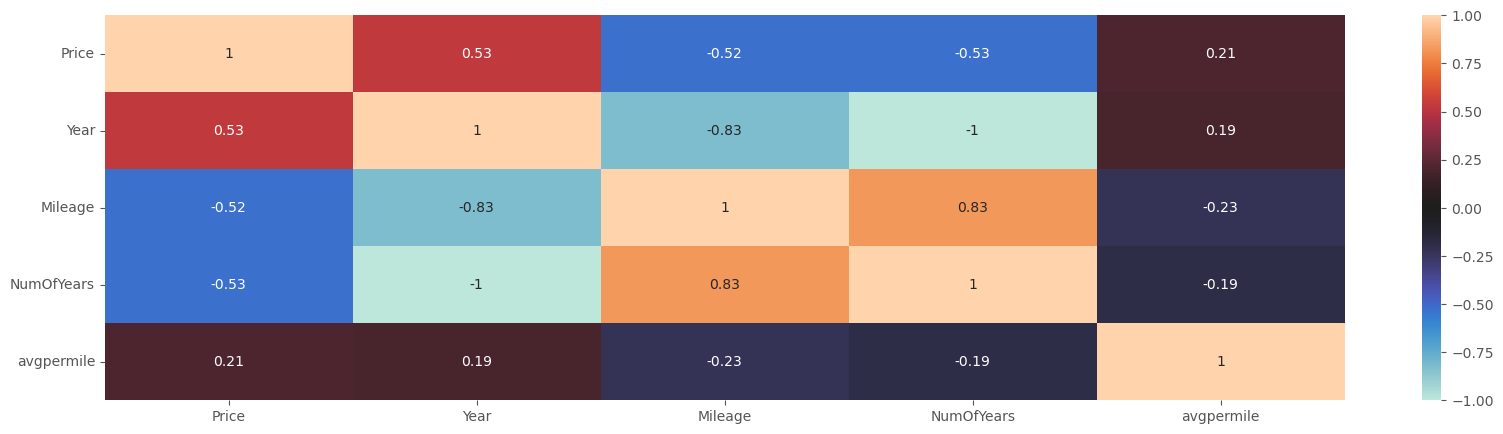

In [43]:
plt.figure(figsize=(20,5))
feature_correlation = true_car_nissan_2.corr()
sns.heatmap(feature_correlation,annot=True,vmin=-1,vmax=1,center=0)



In [40]:
true_car_nissan_2

,Price,Year,Mileage,City,State,Vin,Make,Model,NumOfYears,avgpermile
1,9500,2009,18013,Long Island City,NY,1N4AA51E59C826885,Nissan,Maxima4dr,9,0.527397
2,5499,2009,68064,West Bridgewater,MA,1N4AA51E19C822901,Nissan,Maxima4dr,9,0.080792
3,3990,2009,77795,Homestead,FL,1N4AL21E89N400959,Nissan,Altima4dr,9,0.051289
4,4995,2009,70934,Bloomingdale,NJ,1N4CL21E99C163564,Nissan,Altima4dr,9,0.070418
5,5999,2009,60058,Woodside,NY,1N4AL24E69C145767,Nissan,Altima2dr,9,0.099887
...,...,...,...,...,...,...,...,...,...,...
66240,3500,1999,219335,Centennial,CO,JN8AR07Y7XW364689,Nissan,Pathfinder4dr,19,0.015957
66243,2895,1999,147815,Houston,TX,1N4AB41D4XC703123,Nissan,Sentra4dr,19,0.019585
66244,1991,1999,192971,BIXBY,OK,1N4DL01D4XC238006,Nissan,Altima4dr,19,0.010318
66246,1595,1999,220000,Gautier,MS,1N4DL01D7XC188640,Nissan,Altima4dr,19,0.007250


In [41]:
true_car_nissan_2.drop(columns=["City","State","Vin","Make","Model"],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18332\1300586795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_car_nissan_2.drop(columns=["City","State","Vin","Make","Model"],inplace=True)


In [42]:
true_car_nissan_2

,Price,Year,Mileage,NumOfYears,avgpermile
1,9500,2009,18013,9,0.527397
2,5499,2009,68064,9,0.080792
3,3990,2009,77795,9,0.051289
4,4995,2009,70934,9,0.070418
5,5999,2009,60058,9,0.099887
...,...,...,...,...,...
66240,3500,1999,219335,19,0.015957
66243,2895,1999,147815,19,0.019585
66244,1991,1999,192971,19,0.010318
66246,1595,1999,220000,19,0.007250


In [ ]:
## applying Linear regression algorithm

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
## pick up the price and year

In [45]:
true_car_nissan_linear=true_car_nissan_2[["Mileage","Price"]]
true_car_nissan_linear.sort_values(by="Mileage",ascending=True)
print(true_car_nissan_linear)

       Mileage  Price
1        18013   9500
2        68064   5499
3        77795   3990
4        70934   4995
5        60058   5999
...        ...    ...
66240   219335   3500
66243   147815   2895
66244   192971   1991
66246   220000   1595
66248   198361   1995

[60986 rows x 2 columns]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


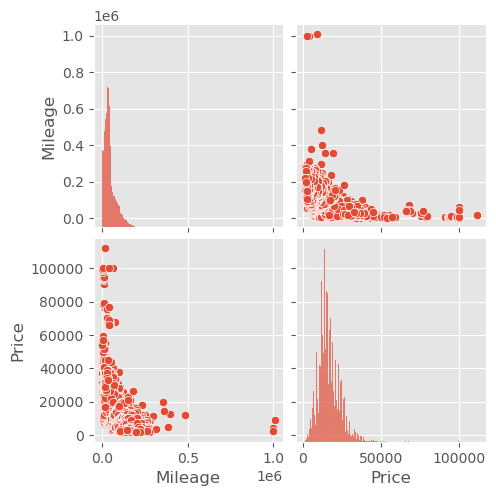

In [46]:
sns.pairplot(true_car_nissan_linear)

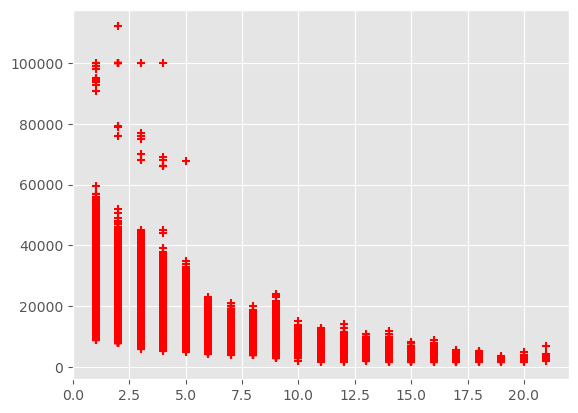

In [47]:
#not a good model to use, as the data itself is not linear in nature
#how to reduce the outlier ? 

%matplotlib inline
plt.scatter(true_car_nissan_2.NumOfYears,true_car_nissan_2.Price,color='red',marker='+')

#plt.plot(true_car_nissan_2.Mileage, reg.predict(true_car_nissan_2[["Mileage"]]) , color = "Blue")

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
#multi regression , creating the selection

true_carMR=true_car_nissan_2[["Price","NumOfYears","Mileage"]]

In [52]:
x=pd.DataFrame(true_carMR[["Mileage","NumOfYears"]])
y=pd.DataFrame(true_carMR["Price"])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [55]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred=LR.predict(x_test)

In [57]:
from sklearn import metrics

In [61]:
metrics.r2_score(y_test,y_pred)


0.30530444922874755

In [60]:
LR.score(x_test,y_test)

#here my score is low [30%] ,
## im not too sure if there is something with the data set or i'm applyg the wrong methods

0.30530444922874755

In [62]:
LR.intercept_
LR.coef_

array([[-5.37439067e-02, -8.26083040e+02]])

In [63]:
LR.predict([[4,9000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7412517.33528967]])

In [64]:
true_carMR[(true_carMR["NumOfYears"]==4) & 
        (true_carMR["Mileage"]<9000)].mean()



Price         14182.132353
NumOfYears        4.000000
Mileage        7651.250000
dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [69]:
# calculate RMSE
sqrt(mean_squared_error([[14182.132353]], [[7384270.11394995]])) 

#7370087.9815969495 .... :

7370087.9815969495